In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio
from pathlib import Path
from began import build_discriminator, build_generator, build_adversarial_model, training_schedule

from IPython import display

In [3]:
data_dir = Path("../data/preprocessed")
training_data = np.load(data_dir / "GNILC_dust_map.npy")
MODEL_DIR = Path("../models")

In [4]:
training_data.shape

(1033, 256, 256, 1)

In [5]:
TRAIN_BUFF = 1033
BATCH_SIZE = 32

In [6]:
train_images = tf.data.Dataset.from_tensor_slices(training_data).shuffle(TRAIN_BUFF).batch(BATCH_SIZE)

In [7]:
# Network architecture
DEPTH = 32
IMG_DIM = 256
CHANNELS = 1
KERNELS = [5, 5, 5]
STRIDES = [2, 2, 2]
FILTERS = [DEPTH * 2 ** i for i in range(len(KERNELS))]
LATENT_DIM = 64

In [8]:
# Derived parameters
SHAPE = (IMG_DIM, IMG_DIM, CHANNELS)

In [15]:
# Training parameters
EPOCHS = 50
BATCH_SIZE = 32

In [10]:
# Build inidividual and joint models.
DIS = build_discriminator(FILTERS, KERNELS, STRIDES, SHAPE)
GEN = build_generator(DIS, FILTERS, KERNELS, STRIDES, LATENT_DIM, SHAPE)
ADV = build_adversarial_model(DIS, GEN)
print(GEN.summary())

Model: "Generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_G (Dense)              (None, 131072)            8519680   
_________________________________________________________________
Reshape (Reshape)            (None, 32, 32, 128)       0         
_________________________________________________________________
BNorm_G1 (BatchNormalization (None, 32, 32, 128)       512       
_________________________________________________________________
LRelu_G1 (LeakyReLU)         (None, 32, 32, 128)       0         
_________________________________________________________________
UpSample_1 (UpSampling2D)    (None, 64, 64, 128)       0         
_________________________________________________________________
Conv2D_G1 (Conv2D)           (None, 64, 64, 64)        204864    
_________________________________________________________________
BN_G2 (BatchNormalization)   (None, 64, 64, 64)        25

In [11]:
trained_model = training_schedule(DIS, GEN, ADV, train_images, LATENT_DIM, EPOCHS)

Step number 00000, GAN loss is 0.416
Step number 00001, GAN loss is 4.388
Step number 00002, GAN loss is 5.423
Step number 00003, GAN loss is 4.097
Step number 00004, GAN loss is 2.679
Step number 00005, GAN loss is 2.470
Step number 00006, GAN loss is 1.636
Step number 00007, GAN loss is 1.411
Step number 00008, GAN loss is 1.474
Step number 00009, GAN loss is 2.062
Step number 00010, GAN loss is 0.234
Step number 00011, GAN loss is 0.118
Step number 00012, GAN loss is 0.197
Step number 00013, GAN loss is 0.336
Step number 00014, GAN loss is 7.996
Step number 00015, GAN loss is 7.951
Step number 00016, GAN loss is 0.081
Step number 00017, GAN loss is 4.244
Step number 00018, GAN loss is 5.955
Step number 00019, GAN loss is 1.113
Step number 00020, GAN loss is 0.056
Step number 00021, GAN loss is 0.064
Step number 00022, GAN loss is 0.042
Step number 00023, GAN loss is 0.066
Step number 00024, GAN loss is 0.139
Step number 00025, GAN loss is 0.023
Step number 00026, GAN loss is 0.169
S

In [11]:
trained_model.save(str(MODEL_DIR / "dust_dcgan.h5"))

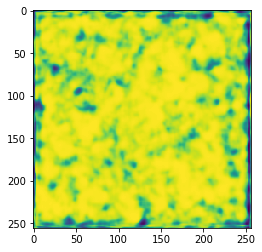

In [14]:
plt.imshow(trained_model.get_layer('Generator').predict(np.random.randn(1, 64))[0, :, :, 0])